# Shallow Learning Algorithms

Lets try some shallow learning algorithms on the data that we have collected on CFRP Composites. This was the data used for our Generalizability Test in our research paper which we collected using ABAQUS simulations. First import some libraries.

Each cell of code has been annotated briefly

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [46]:
# Step 1: Load the data
file_path = 'Github Data.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path, sheet_name='Shallow Learning CFRP')

In [47]:
# Step 2: Define the input features (X) and target variable (y)
X = df[['Soft Modulus', 'Hard Modulus', 'Phase Fractions']]  # Inputs
y = df['Composite Modulus']  # Output

In [48]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [49]:
# Step 4: Apply Polynomial Features (degree=2 for this example)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [50]:
# Step 5: Train a linear regression model on the polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [51]:
# Step 6: Make predictions on the test set
y_pred = model.predict(X_test_poly)

In [52]:
# Step 7: Evaluate the model (using Mean Squared Error and R² score)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 0.009265472855081638
R² Score: 0.9934666404890157


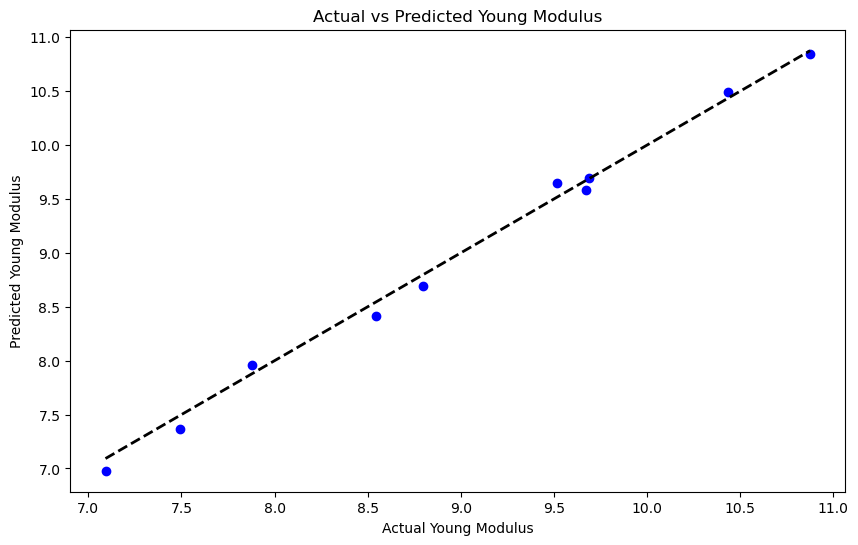

In [53]:
# Step 8: Plot the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Young Modulus')
plt.ylabel('Predicted Young Modulus')
plt.title('Actual vs Predicted Young Modulus')
plt.show()

In [54]:
# Step 9: Display the polynomial equation
print("\nPolynomial Model Equation:")
terms = poly.get_feature_names_out(['Soft Modulus', 'Hard Modulus', 'Phase Fractions'])
for term, coef in zip(terms, model.coef_):
    print(f"{coef:.6f} * {term}")
print(f"Intercept: {model.intercept_:.4f}")


Polynomial Model Equation:
0.000000 * 1
1.761253 * Soft Modulus
-0.517665 * Hard Modulus
-3.093955 * Phase Fractions
-0.146602 * Soft Modulus^2
0.065250 * Soft Modulus Hard Modulus
-0.679593 * Soft Modulus Phase Fractions
-0.002070 * Hard Modulus^2
1.083113 * Hard Modulus Phase Fractions
0.993711 * Phase Fractions^2
Intercept: 2.2867


Ok, so we have done polynomial regression so far. Lets try some other techniques as well. We will first create a function for evaluating the performance of each algorithm we try

In [55]:
# Define a function to evaluate the models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Model: {model.__class__.__name__}')
    print(f'Mean Squared Error: {mse}')
    print(f'R² Score: {r2}')
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual Young Modulus')
    plt.ylabel('Predicted Young Modulus')
    plt.title(f'Actual vs Predicted - {model.__class__.__name__}')
    plt.show()


Polynomial Regression:
Model: LinearRegression
Mean Squared Error: 0.009265472855081638
R² Score: 0.9934666404890157


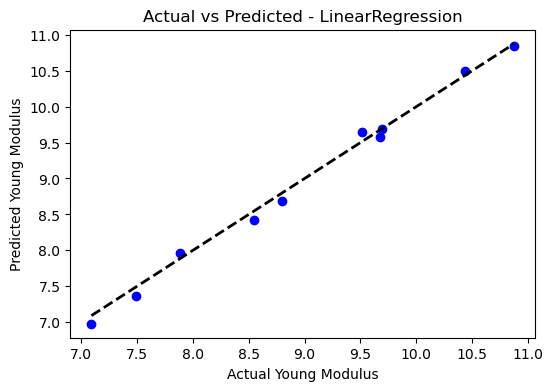

In [56]:
# Step 4: Apply Polynomial Regression
print("\nPolynomial Regression:")
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_model = LinearRegression()
evaluate_model(poly_model, X_train_poly, y_train, X_test_poly, y_test)


Support Vector Regression (SVR):
Model: SVR
Mean Squared Error: 0.01979807581627374
R² Score: 0.9860397899862714


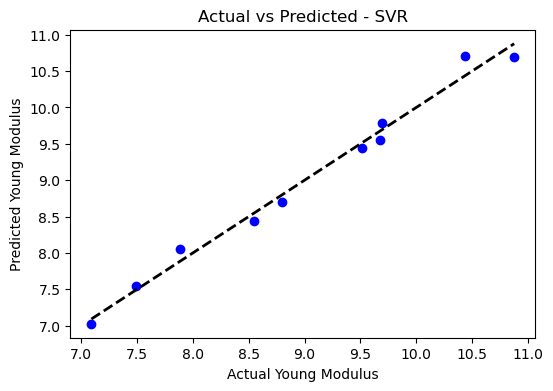

In [57]:
# Standardize features for models like SVR that are sensitive to feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Apply Support Vector Regression (with a linear kernel)
print("\nSupport Vector Regression (SVR):")
svr_model = SVR(kernel='linear', C=100, gamma = 'auto')
evaluate_model(svr_model, X_train_scaled, y_train, X_test_scaled, y_test)


Gradient Boosting Regressor:
Model: GradientBoostingRegressor
Mean Squared Error: 0.012805031464595204
R² Score: 0.9909707928115311


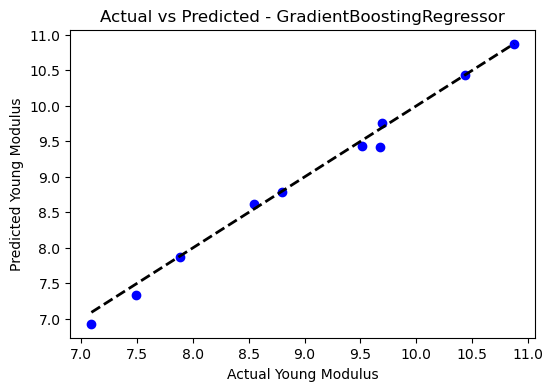

In [58]:
# Step 6: Apply Gradient Boosting Regressor
print("\nGradient Boosting Regressor:")
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=101)
evaluate_model(gbr_model, X_train, y_train, X_test, y_test)


Random Forest Regressor:
Model: RandomForestRegressor
Mean Squared Error: 0.037252251608071676
R² Score: 0.9737323333459776


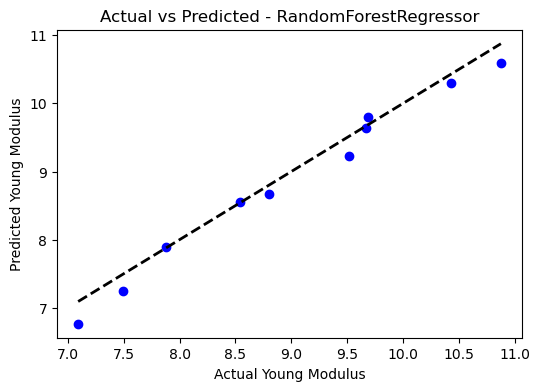

In [59]:
# Step 7: Apply RandomForestRegressor
print("\nRandom Forest Regressor:")
rf_model = RandomForestRegressor(n_estimators=100, random_state=101)
evaluate_model(rf_model, X_train, y_train, X_test, y_test)

If you want to explore how important each of the input features are, the best is Random Forest

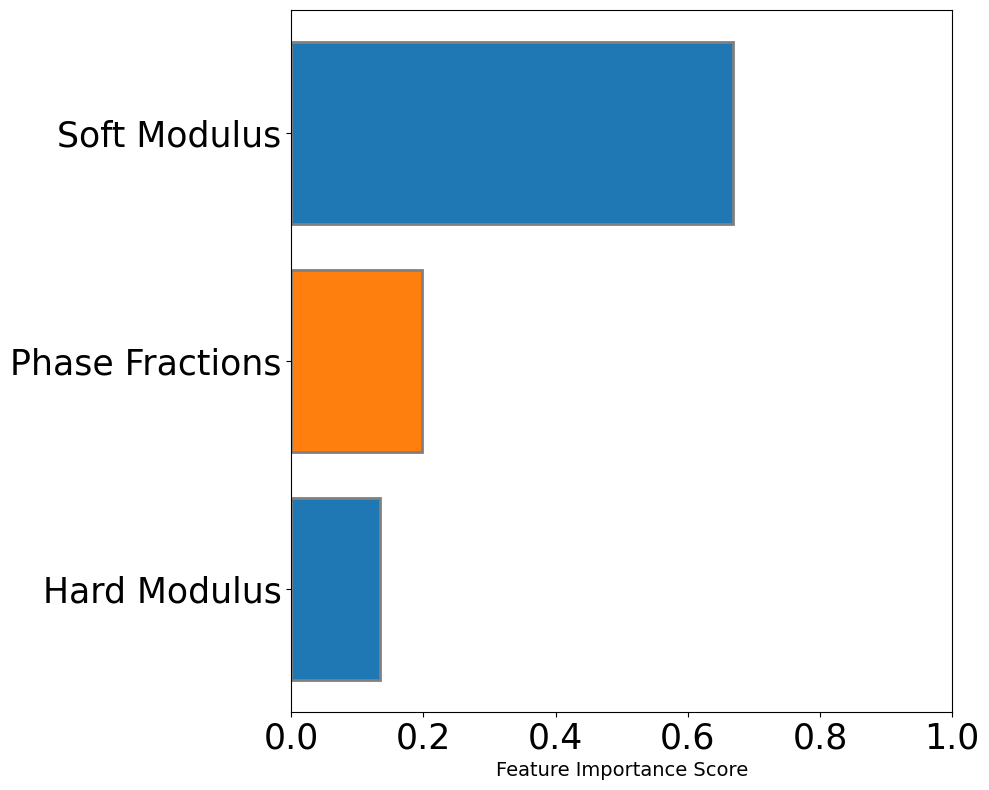

Feature: Hard Modulus, Importance Score: 0.1349
Feature: Phase Fractions, Importance Score: 0.1973
Feature: Soft Modulus, Importance Score: 0.6678


In [60]:
# Step 1: Train a RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=71)
rf_model.fit(X_train, y_train)

# Step 2: Get the feature importance scores
importance = rf_model.feature_importances_

# Step 3: Define the feature names and their colors
features = ['Soft Modulus', 'Hard Modulus', 'Phase Fractions']
color_map = {
    'Soft Modulus': '#1f77b4',  # Blue
    'Hard Modulus': '#1f77b4',  # Orange
    'Phase Fractions': '#ff7f0e'  # Green
}
#ff7f0e
# Sorting the features based on their importance for better visualization
sorted_indices = np.argsort(importance)
sorted_features = [features[i] for i in sorted_indices]
sorted_importance = [importance[i] for i in sorted_indices]

# Function to get the color based on the feature
def get_colors(features):
    return [color_map[feature] for feature in features]

# Plot settings
xlabel_fontsize = 14
ylabel_fontsize = 14
title_fontsize = 25
xticks_fontsize = 25
yticks_fontsize = 25
tick_density = 0.2  # Adjust the density of ticks

# Plot the feature importance with a similar style to the given example
plt.figure(figsize=(10, 8))
plt.barh(sorted_features, sorted_importance, color=get_colors(sorted_features), edgecolor='grey', linewidth=2)

# Add labels and customize the plot
plt.xlabel('Feature Importance Score', fontsize=xlabel_fontsize)
#plt.title('Feature Importance in Random Forest Model', fontsize=title_fontsize)
plt.xticks(np.arange(0, 1.1, tick_density), fontsize=xticks_fontsize)
plt.yticks(fontsize=yticks_fontsize)

# Add gridlines for better visual guidance
#plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Show the plot with tight layout
plt.tight_layout()
plt.show()

# Step 4: Print feature importance scores
for feature, score in zip(sorted_features, sorted_importance):
    print(f"Feature: {feature}, Importance Score: {score:.4f}")


# Now lets run ML code on another dataset which is on different morphologies of CFRP and corresponding properties

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score

# Step 1: Load the data
file_path = 'Github Data.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path, sheet_name='Shallow Learning CFRP Shapes')

# Step 2: Define the input features (X) and target variable (y)
X = df[['Soft Modulus', 'Hard Modulus', 'Phase Fraction', 'Shape']]  # Inputs
y = df["CFRP Modulus"]  # Output

# One-Hot Encode the 'Shape' column
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X[['Shape']]).toarray()

# Replace the original 'Shape' column with the one-hot encoded version
X = pd.concat([X[['Soft Modulus', 'Hard Modulus', 'Phase Fraction']], pd.DataFrame(X_encoded)], axis=1)

# Convert all column names to strings to avoid the TypeError
X.columns = X.columns.astype(str)

# Standardize features for models like SVR that are sensitive to feature scaling
scaler = StandardScaler()

# Split the data with a fixed test size of 0.2
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=101)

# Standardize the data for SVR
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a function to evaluate the models and return R² scores
def evaluate_model_r2(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return r2_score(y_test, y_pred)

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_model = LinearRegression()
poly_r2 = evaluate_model_r2(poly_model, X_train_poly, y_train, X_test_poly, y_test)

# Support Vector Regression (with a linear kernel)
svr_model = SVR(kernel='linear', C=100, gamma='auto')
svr_r2 = evaluate_model_r2(svr_model, X_train_scaled, y_train, X_test_scaled, y_test)

# Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=101)
gbr_r2 = evaluate_model_r2(gbr_model, X_train, y_train, X_test, y_test)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=101)
rf_r2 = evaluate_model_r2(rf_model, X_train, y_train, X_test, y_test)

# Print the R² results
print(f"Polynomial Regression R²: {poly_r2}")
print(f"SVR R²: {svr_r2}")
print(f"Gradient Boosting R²: {gbr_r2}")
print(f"Random Forest R²: {rf_r2}")


Polynomial Regression R²: 0.9978905645268594
SVR R²: 0.993741010825088
Gradient Boosting R²: 0.9972236689488152
Random Forest R²: 0.9934251334105996


These were the key points of how to use shallow learning for such material works. A lot more can be done.